<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
Целевой признак
Exited — факт ухода клиента

## Подготовка данных

In [31]:
#подключим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score

In [32]:
#выведем на экран данные
df = pd.read_csv('./Churn.csv')
display(df.sample(10))
df.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2852,2853,15771483,Arnold,609,France,Male,40,6.0,0.00,2,1,1,97416.34,0
9486,9487,15605130,Seccombe,753,France,Male,32,6.0,177729.13,1,1,1,161642.08,0
1588,1589,15758035,Bateson,747,France,Male,61,7.0,155973.13,1,0,1,147554.26,0
905,906,15675964,Chukwukadibia,672,France,Female,45,9.0,0.00,1,1,1,92027.69,1
9957,9958,15672237,Oluchi,633,France,Male,25,1.0,0.00,1,1,0,100598.98,0
3166,3167,15746203,Hsia,555,Germany,Male,62,4.0,119817.33,1,0,1,43507.10,1
7917,7918,15590094,Nwachukwu,613,Germany,Male,38,9.0,126265.88,2,0,0,15859.95,0
3252,3253,15699619,Rivas,641,France,Male,31,10.0,155978.17,1,1,0,91510.71,0
7043,7044,15704581,Robertson,595,Germany,Male,34,2.0,87967.42,2,0,1,156309.52,0
9381,9382,15756148,Nnanna,765,Spain,Male,45,2.0,91549.78,1,1,1,47139.44,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [33]:
#удалим лишние столбцы,не несущие необходимой информ.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [34]:
data = (np.random.randint(0,10,size=df['Tenure'].isna().sum()))
df.loc[df['Tenure'].isna(),'Tenure']= data

In [35]:
#встречаются категориальные признаки,преобразуем эти столбцы.
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
5939,766,30,4.0,127786.28,2,1,1,28879.30,0,1,0,1
7155,515,45,7.0,120961.50,3,1,1,39288.11,1,1,0,1
4825,622,31,5.0,106260.67,1,1,1,2578.43,0,0,0,1
4483,539,38,8.0,105435.74,1,0,0,80575.44,1,1,0,0
1526,711,34,8.0,0.00,2,0,0,48260.19,0,0,0,1


In [36]:
display(df.sample(10))
df.info()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6669,517,56,9.0,142147.32,1,0,0,39488.04,1,0,0,1
1752,744,41,2.0,84113.41,1,1,0,197548.63,0,1,0,0
5682,620,29,9.0,0.00,2,1,0,13133.88,0,0,1,1
2053,850,63,8.0,169832.57,1,0,0,184107.26,1,0,0,1
604,702,37,10.0,150525.80,1,1,1,94728.49,0,0,0,1
8469,720,71,5.0,183135.39,2,1,1,197688.50,0,0,0,1
1198,584,38,9.0,104584.16,1,1,0,176678.72,0,0,0,1
1112,690,42,3.0,92578.14,2,0,0,70810.60,0,0,0,0
7889,600,57,9.0,138456.03,2,1,1,103548.25,0,1,0,1
6564,652,47,0.0,126597.89,2,1,1,38798.79,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


In [37]:
#df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


## Исследование задачи

In [38]:
#Разделим данные
features = df.drop('Exited', axis=1)
target = df['Exited']



In [39]:
#Разделим получившиеся выборки на обучающую, валидационную, тестовую.
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

print('Размеры наборов данных:')
print('Обучающий:    ', features_train.shape)
print('Валидационный:', features_valid.shape)
print('Тестовый:     ', features_test.shape)


Размеры наборов данных:
Обучающий:     (6000, 11)
Валидационный: (2000, 11)
Тестовый:      (2000, 11)


In [40]:
#Маштабируем числовые признаки

numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [41]:
#Дерево решений
def decision_tree(features_tr, target_tr, features_val, target_val, cw=None):
    best_depth = 0
    best_f1 = 0
    best_roc_auc = 0
    best_predictions = 0
    
    for depth in range(2, 31):
    
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=cw)
        model.fit(features_tr, target_tr)
    
        predictions_valid = model.predict(features_val)
        f1 = f1_score(target_val, predictions_valid)
        
        predictions = model.predict_proba(features_val)[:,1]
        roc_auc = roc_auc_score(target_val, predictions)
        
        
        if f1 > best_f1:
            best_depth = depth
            best_f1 = f1    
            best_roc_auc = roc_auc
            best_predictions = predictions_valid 
            
    print("Глубина дерева:", best_depth)
    print("f1-мера:       ", best_f1)
    print("roc_auc:       ", best_roc_auc)
    print('Доля правильных ответов:',accuracy_score(target_val, best_predictions))
    print('Соотношение классов:',pd.Series(best_predictions).value_counts(normalize=True), sep='\n')
decision_tree(features_train, target_train, features_valid, target_valid)

Глубина дерева: 6
f1-мера:        0.5696969696969697
roc_auc:        0.8164631712023421
Доля правильных ответов: 0.858
Соотношение классов:
0    0.879
1    0.121
dtype: float64


In [42]:
#Random Forest
def random_forest(features_tr, target_tr, features_val, target_val, cw=None):
    best_est = 0
    best_depth = 0
    best_f1 = 0
    best_roc_auc = 0
    best_predictions = 0

    for est in range(2, 21):
        for depth in range(2,21):
        
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight=cw)
    
            model.fit(features_tr, target_tr)
    
            predictions_valid = model.predict(features_val)
            f1 = f1_score(target_val, predictions_valid)
            
            predictions =model.predict_proba(features_val)[:,1]
            roc_auc = roc_auc_score(target_val, predictions)
        
            if f1 > best_f1:
                best_est = est
                best_depth = depth
                best_f1 = f1    
                best_roc_auc = roc_auc  
                best_predictions = predictions_valid 
    
    print("Кол-во деревьев:", best_est)
    print("Глубина дерева: ", best_depth)
    print("f1-мера:        ", best_f1)
    print("roc_auc:        ", best_roc_auc)
    print('Доля правильных ответов:',accuracy_score(target_val, best_predictions))
    print('Соотношение классов:',pd.Series(best_predictions).value_counts(normalize=True), sep='\n')

random_forest(features_train, target_train, features_valid, target_valid)

Кол-во деревьев: 13
Глубина дерева:  18
f1-мера:         0.6073446327683616
roc_auc:         0.8223706893944436
Доля правильных ответов: 0.861
Соотношение классов:
0    0.855
1    0.145
dtype: float64


In [43]:
#LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
    
predictions_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid)

predictions = model.predict_proba(features_valid)[:,1]
roc_auc = roc_auc_score(target_valid, predictions)

print("f1-мера: ", f1)
print("roc_auc: ", roc_auc)  
print('Доля правильных ответов:',accuracy_score(target_valid, predictions_valid))
print('Соотношение классов:',pd.Series(predictions_valid).value_counts(normalize=True), sep='\n')



f1-мера:  0.33389544688026984
roc_auc:  0.7589554134733455
Доля правильных ответов: 0.8025
Соотношение классов:
0    0.9125
1    0.0875
dtype: float64


0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

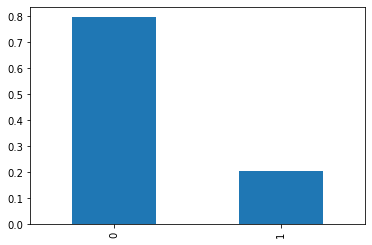

In [44]:
# Проверим, как часто в целевом признаке встречается класс «1» или «0»
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

Вывод: Лучше всего себя показали дерево решений и случайный лес. 

## Борьба с дисбалансом

Взвешивние классов. 

In [45]:
#Дерево решений
decision_tree(features_train, target_train, features_valid, target_valid, cw ='balanced')

Глубина дерева: 5
f1-мера:        0.5963791267305644
roc_auc:        0.8310244134068074
Доля правильных ответов: 0.8105
Соотношение классов:
0    0.7395
1    0.2605
dtype: float64


In [46]:
#Случайный лес
random_forest(features_train, target_train, features_valid, target_valid, cw='balanced')

Кол-во деревьев: 19
Глубина дерева:  8
f1-мера:         0.6269925611052072
roc_auc:         0.8510606766312401
Доля правильных ответов: 0.8245
Соотношение классов:
0    0.7385
1    0.2615
dtype: float64


Показатели f1 и roc_auc возрасли.

Напишем функцию уменьшения и увеличения выборок. 

In [47]:
# Создадим функцию для увеличения обучающей выборки класса 1 в несколько раз
def upsample(features, target, repeat):
    # Разделилим обучающую выборку на отрицательные и положительные объекты.
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # Объединим таблицы
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    # Перемешаем данные
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [48]:
# Применим функцию для увеличения выборки класса 1 в 4 раза
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [49]:
#Модель дерева решений с учетом балансировки

best_tree_model = None
best_tree_result = 0
best_tree_depth = 0
best_predicted_valid = 0
best_roc_auc = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # инициализируем модель DecisionTreeClassifier с параметром random_state=12345 и max_depth=depth
    model.fit(features_upsampled, target_upsampled) # обучим модель на новой тренировочной выборке
    predicted_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке
    
    f1 = f1_score(target_valid, predicted_valid)
    
    predictions = model.predict_proba(features_valid)[:,1]
    roc_auc = roc_auc_score(target_valid, predictions)
    
    
    if f1 > best_tree_result:
        best_tree_model = model
        best_tree_result = f1
        best_tree_depth = depth
        best_predicted_valid = predicted_valid
        best_roc_auc = roc_auc
        
print("F1-мера наилучшей модели на валидационной выборке:", best_tree_result,
      "Глубина дерева:", best_tree_depth,"roc_auc:", best_roc_auc, sep='\n')

F1-мера наилучшей модели на валидационной выборке:
0.5963791267305644
Глубина дерева:
5
roc_auc:
0.8310244134068074


In [50]:
#Модель Случайный лес с учетом балансировки
best_forest_model = None
best_forest_result = 0
best_forest_est = 0
best_forest_depth = 0
best_predicted_valid = 0
best_roc_auc = 0
for est in range(21, 41, 2):
    for depth in range (31, 51, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # инициализируем модель RandomForestClassifier с параметрами random_state=12345, 
        # n_estimators=est и max_depth=depth
        model.fit(features_upsampled, target_upsampled) # обучим модель на тренировочной выборке
        predicted_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке
        f1 = f1_score(target_valid, predicted_valid)
        
        predictions = model.predict_proba(features_valid)[:,1]
        roc_auc = roc_auc_score(target_valid, predictions)
        
        
        if f1 > best_forest_result:
            best_forest_model = model
            best_forest_result = f1
            best_forest_est = est
            best_forest_depth = depth
            best_predicted_valid = predicted_valid
            best_roc_auc = roc_auc
            

print("F1-мера наилучшей модели на валидационной выборке:", best_forest_result,
      "Количество деревьев:", best_forest_est, "Максимальная глубина:", best_forest_depth,"roc_auc:", best_roc_auc, sep='\n')

F1-мера наилучшей модели на валидационной выборке:
0.6028833551769331
Количество деревьев:
25
Максимальная глубина:
31
roc_auc:
0.8251577253673201


In [51]:
# Применим функцию для увеличения выборки класса 1 в 4 раза
features_downsample, target_downsample = upsample(features_train, target_train, 4)

In [52]:
# Создадим функцию для уменьшения обучающей выборки класса 1 в несколько раз
def downsample(features, target, repeat):
    # Разделилим обучающую выборку на отрицательные и положительные объекты.
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # Объединим таблицы
    features_downsample = pd.concat([features_zeros] + [features_ones] * repeat)
    target_downsample = pd.concat([target_zeros] + [target_ones] * repeat)
    # Перемешаем данные
    features_downsample, target_downsample = shuffle(
        features_downsample, target_downsample, random_state=12345)
    
    return features_downsample, target_downsample

In [ ]:
#Модель дерева решений с учетом балансировки

best_tree_model = None
best_tree_result = 0
best_tree_depth = 0
best_predicted_valid = 0
best_roc_auc = 0
for depth in range(1, 51):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # инициализируем модель DecisionTreeClassifier с параметром random_state=12345 и max_depth=depth
    model.fit(features_downsample, target_downsample) # обучим модель на новой тренировочной выборке
    predicted_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке
    f1 = f1_score(target_valid, predicted_valid)
    
    predictions = model.predict_proba(features_valid)[:,1]
    roc_auc = roc_auc_score(target_valid, predictions)
    
    
    if f1 > best_tree_result:
        best_tree_model = model
        best_tree_result = f1
        best_tree_depth = depth
        best_predicted_valid = predicted_valid
        best_roc_auc = roc_auc
        

print("F1-мера наилучшей модели на валидационной выборке:", best_tree_result,
      "Глубина дерева:", best_tree_depth,"roc_auc:", best_roc_auc, sep='\n')

In [ ]:
#Модель Случайный лес с учетом балансировки
best_forest_model = None
best_forest_result = 0
best_forest_est = 0
best_forest_depth = 0
best_predicted_valid = 0
best_roc_auc = 0
for est in range(21, 41, 2):
    for depth in range (31, 51, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # инициализируем модель RandomForestClassifier с параметрами random_state=12345, 
        # n_estimators=est и max_depth=depth
        model.fit(features_downsample, target_downsample) # обучим модель на тренировочной выборке
        predicted_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке
        f1 = f1_score(target_valid, predicted_valid)
        
        
        predictions = model.predict_proba(features_valid)[:,1]
        roc_auc = roc_auc_score(target_valid, predictions)
        
        if f1 > best_forest_result:
            best_forest_model = model
            best_forest_result = f1
            best_forest_est = est
            best_forest_depth = depth
            best_predicted_valid = predicted_valid
            best_roc_auc = roc_auc

print("F1-мера наилучшей модели на валидационной выборке:", best_forest_result,
      "Количество деревьев:", best_forest_est, "Максимальная глубина:", best_forest_depth, "roc_auc:", best_roc_auc, sep='\n')

## Тестирование модели

Финанльное теслирование

In [ ]:
#Объеденим выборки для тестирования
features = pd.concat([features_train, features_valid], ignore_index=True)
target = pd.concat([target_train, target_valid], ignore_index=True)

In [ ]:

model = RandomForestClassifier(random_state=12345, n_estimators=20,max_depth=8)

model.fit(features_downsample, target_downsample)
predictions = model.predict(features_test)

f1 = f1_score(target_test, predictions)

predictions = model.predict_proba(features_test)[:,1]
roc_auc = roc_auc_score(target_test, predictions)

print(' f1 = {}, \n roc_auc = {}'.format(round(f1,4), round(roc_auc,4)))
print('')

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Важность факторов')
pyplot.show()

n=1


Вывод:

Модели продемонстрировали хороший результат на тестовой выборке,
у обоих моделей f1-мера больше 0.59, согласно условиям задачи. auc_roc > 0.5, модели адекватны.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*